In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras import layers, models

In [4]:
image_path = "dog.6.jpg"  
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

In [6]:
if image is None:
    raise ValueError("Error: Image not found. Check the file path.")

In [8]:
# Resize the image to 64x64 for consistency
image = cv2.resize(image, (64, 64))

In [10]:
# Normalize pixel values (scale to 0-1)
image = image / 255.0

In [12]:
# Expand dimensions to match CNN input (batch_size, height, width, channels)
image = np.expand_dims(image, axis=(0, -1))  # Shape: (1, 64, 64, 1)

In [14]:
print(f"Image Shape for CNN: {image.shape}")  # (1, 64, 64, 1)


Image Shape for CNN: (1, 64, 64, 1)


In [22]:
#: Define CNN Model
model = models.Sequential([
    layers.Conv2D(3, (3, 3), activation='relu', input_shape=(64, 64, 1)),  # 3 Filters
    layers.MaxPooling2D((2, 2)),  # Pooling layer (32x32 output)
    
    layers.Conv2D(3, (3, 3), activation='relu'),  # Second Conv Layer
    layers.MaxPooling2D((2, 2)),  # Pooling layer (16x16 output)

    layers.Conv2D(3, (3, 3), activation='relu'),  # Third Conv Layer
    layers.MaxPooling2D((2, 2)),  # Pooling layer (8x8 output)

    layers.Flatten(),  # Flatten output (3x8x8 = 192)
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(2, activation='softmax')  # Output layer (2 classes: Cats/Dogs)
])


In [30]:
# Compile Model
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 62, 62, 3)      │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 31, 31, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 29, 29, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 12, 12, 3)      │            84 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 6, 6, 3)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 108)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        13,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,408 (56.28 KB)

 Trainable params: 14,408 (56.28 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
X_train = np.tile(image, (10, 1, 1, 1))  # Create 10 copies of the image
y_train = np.random.randint(0, 2, (10, 1))  # Random binary labels (0 or 1)

In [34]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)

In [36]:
history = model.fit(X_train, y_train, epochs=5, verbose=1)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.5000 - loss: 0.6957
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.5000 - loss: 0.6937
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5000 - loss: 0.6933
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.5000 - loss: 0.6934


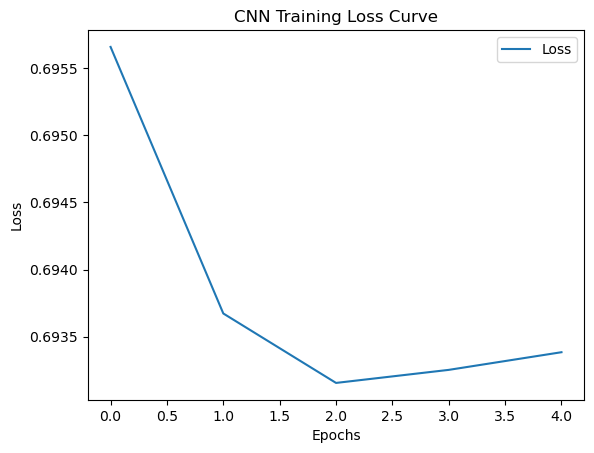

In [38]:
plt.plot(history.history['loss'], label='Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("CNN Training Loss Curve")
plt.legend()
plt.show()


In [40]:
_, accuracy = model.evaluate(X_train, y_train)
print(f"Initial Training Accuracy: {accuracy:.2%}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.5000 - loss: 0.6934   
Initial Training Accuracy: 50.00%
